In [1]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
from torch.optim import *

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"
import shutil

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/MURA")

# Getting data

In [3]:
df = pd.read_csv(path / "train_labeled_studies.csv")
df.head(5)

,path,no
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [4]:
pos_list = df[df["no"] == 1]["path"].values
neg_list = df[df["no"] == 0]["path"].values

In [5]:
pos_list[1], neg_list[1]

('MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/',
 'MURA-v1.1/train/XR_SHOULDER/patient00051/study2_negative/')

In [6]:
(path / pos_list[1]).parts

('/',
 'media',
 'subhaditya',
 'DATA',
 'COSMO',
 'Datasets',
 'MURA',
 'MURA-v1.1',
 'train',
 'XR_SHOULDER',
 'patient00002',
 'study1_positive')

## Pos

In [7]:
pos_final = []

In [8]:
for a in pos_list:
    pos_final.extend((path / a).ls())

In [9]:
len(pos_list)

5177

In [10]:
pos = {x: 1 for x in pos_final}

In [11]:
pos

{PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png'): 1,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png'): 1,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png'): 1,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png'): 1,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png'): 1,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image3.png'): 1,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png'): 1,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00003/s

## Neg

In [12]:
neg_final = []

In [13]:
for a in neg_list:
    neg_final.extend((path / a).ls())

In [14]:
len(neg_list)

8280

In [15]:
dic_neg = {x: 0 for x in neg_final}

In [16]:
dic_neg

{PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/image1.png'): 0,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/image2.png'): 0,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/image3.png'): 0,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/image4.png'): 0,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00051/study2_negative/image1.png'): 0,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00051/study2_negative/image2.png'): 0,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00051/study2_negative/image3.png'): 0,
 PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00058/s

## Df

In [17]:
fin = (
    pd.DataFrame(dic_neg, index=[0])
    .T.reset_index()
    .append(pd.DataFrame(pos, index=[0]).T.reset_index())
)
fin.head(5)

,index,0
0,/media/subhaditya/DATA/COSMO/Datasets/MURA/MUR...,0
1,/media/subhaditya/DATA/COSMO/Datasets/MURA/MUR...,0
2,/media/subhaditya/DATA/COSMO/Datasets/MURA/MUR...,0
3,/media/subhaditya/DATA/COSMO/Datasets/MURA/MUR...,0
4,/media/subhaditya/DATA/COSMO/Datasets/MURA/MUR...,0


In [18]:
fin.iloc[0].values

array([PosixPath('/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/image1.png'),
       0], dtype=object)

In [19]:
def rep(x):
    return x.replace("/media/subhaditya/DATA/COSMO/Datasets/MURA/", "")

In [20]:
rep(
    "/media/subhaditya/DATA/COSMO/Datasets/MURA/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/image1.png"
)

'MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/image1.png'

In [21]:
fin["index"] = fin["index"].astype("str").apply(rep)

In [22]:
to_rem = []
tem = fin["index"].values
for a in range(len(tem)):
    if ".png" not in tem[a]:
        to_rem.append(a)
#         print(a)

In [23]:
to_rem

[16712, 16713, 16714, 16715, 16716, 16717, 16718, 16719]

In [24]:
fin.iloc[to_rem[0]]

index    MURA-v1.1/train/XR_WRIST/patient09082/study1_n...
0                                                        0
Name: 16712, dtype: object

In [25]:
fin.shape

(36816, 2)

In [26]:
fin = fin.drop(to_rem)

In [27]:
to_rem = []
tem = fin["index"].values
for a in range(len(tem)):
    if "._" in tem[a]:
        #         to_rem.append(a)
        print(a)

In [28]:
fin = fin.drop(to_rem)

In [29]:
21947

21947

In [30]:
36820 - 21947

14873

# Databunch

In [31]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=64)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

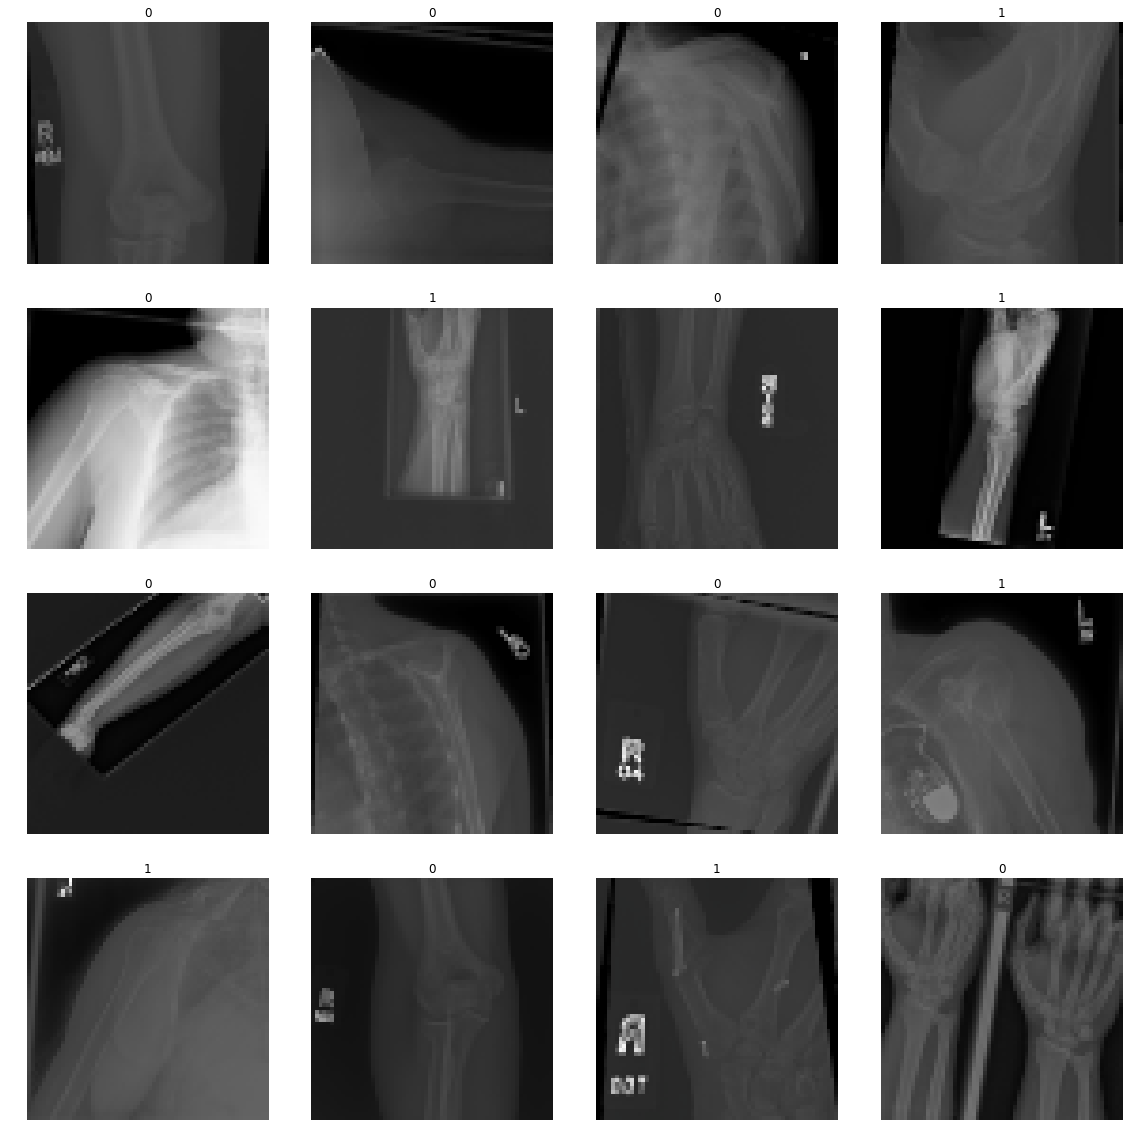

In [32]:
data.show_batch(4)

In [33]:
data.c

2

(array([17622.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0., 11825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

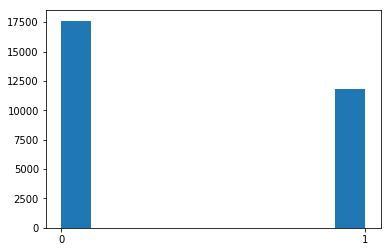

In [34]:
class_sam = [str(x) for x in data.train_ds.y]
plt.hist(class_sam)

In [35]:
from fastai.callbacks import OverSamplingCallback

In [36]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [44]:
learn = None
gc.collect()

13345

# Resnet34 

In [45]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph],pretrained=True
).to_fp16()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.843666,0.664174,0.652493,0.280721,00:58
1,0.626931,0.585024,0.709686,0.378032,00:56
2,0.571918,0.531955,0.751936,0.472007,00:56
3,0.543897,0.546844,0.725988,0.442673,00:57
4,0.543339,0.547461,0.738622,0.438875,00:57
5,0.741789,0.654137,0.682788,0.307591,00:57
6,0.734457,0.661494,0.606711,0.072730,00:57
7,0.641096,0.572181,0.716615,0.404988,00:57
8,0.626162,0.577606,0.730471,0.399901,00:57
9,0.600077,0.566971,0.727075,0.424327,00:57


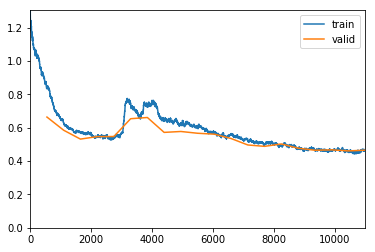

In [46]:
learn.unfreeze()
learn.fit_one_cycle(20,wd=1e-3)

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.459937,0.462341,0.789974,0.560010,00:59
1,0.460507,0.460993,0.792555,0.562529,01:00
2,0.451022,0.467246,0.791197,0.561736,00:58
3,0.450469,0.473861,0.789431,0.560248,00:58
4,0.452206,0.464164,0.790382,0.563363,00:58
5,0.481109,0.509385,0.772993,0.526312,00:57
6,0.471688,0.483550,0.772314,0.523059,00:57
7,0.482512,0.486552,0.771906,0.526030,00:57
8,0.477663,0.521092,0.764027,0.522174,00:57
9,0.486429,0.513559,0.759679,0.511153,00:57


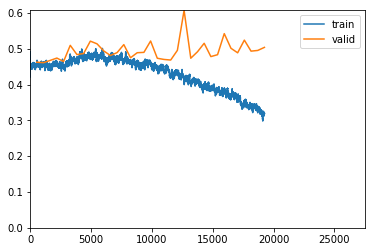

KeyboardInterrupt: 

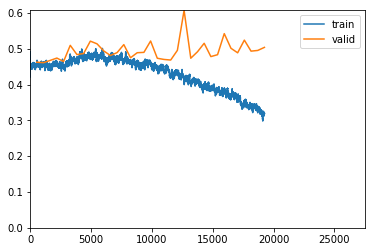

In [47]:
learn.unfreeze()
learn.fit_one_cycle(50,wd=1e-3)

In [48]:
learn.save('stage-1')

## Progressive resize 1

In [49]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [50]:
learn = None
gc.collect()

7546

In [51]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph],pretrained=True
).to_fp16()

In [52]:
learn.load('stage-1');

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


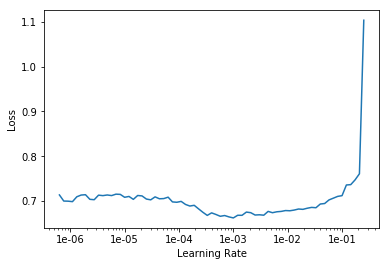

In [53]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.576695,0.534771,0.753430,0.466113,01:06
1,0.531869,0.508714,0.760494,0.472078,01:07
2,0.512408,0.490959,0.775438,0.512302,01:06
3,0.521001,0.481332,0.778699,0.517770,01:06
4,0.486508,0.470633,0.786170,0.538620,01:07
5,0.481362,0.467681,0.793235,0.558267,01:06
6,0.473673,0.463000,0.794457,0.560517,01:07
7,0.468316,0.453323,0.797310,0.564538,01:08
8,0.460364,0.449599,0.798805,0.566816,01:07
9,0.447049,0.446303,0.803967,0.581585,01:08


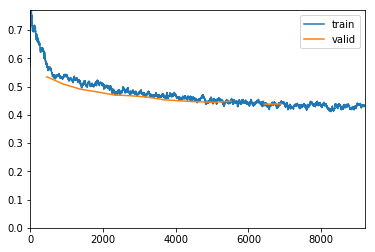

In [54]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(2e-6, 1e-3),wd=1e-3)

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


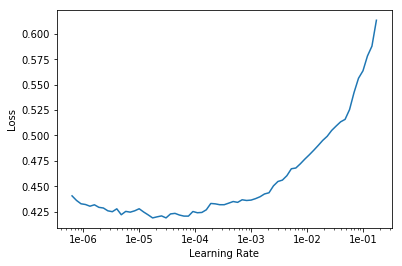

In [57]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.423253,0.438121,0.808314,0.589830,01:05
1,0.420879,0.436830,0.807771,0.590333,01:06
2,0.409350,0.437706,0.807907,0.586482,01:06
3,0.428798,0.437343,0.808450,0.588607,01:07
4,0.429560,0.437901,0.808722,0.588009,01:07
5,0.431823,nan,0.808178,0.586381,01:07
6,0.418879,0.436198,0.809401,0.591167,01:07
7,0.433728,nan,0.809265,0.590899,01:07
8,0.427742,0.436007,0.808586,0.588331,01:08
9,0.427171,0.431791,0.809537,0.592020,01:07


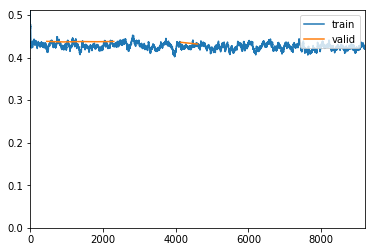

In [56]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-6, 1e-5),wd=1e-2)

In [58]:
learn.save('stage-2')

## Progressive resize 2

In [59]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=256)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [60]:
learn = None
gc.collect()

7265

In [61]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph],pretrained=True
).to_fp16()

In [62]:
learn.load('stage-2');

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


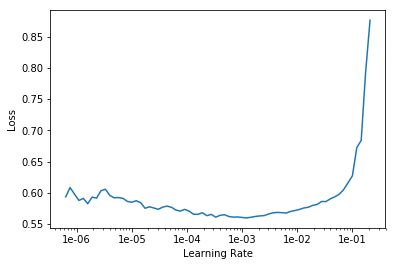

In [63]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.511070,0.481592,0.777748,0.519742,02:02
1,0.484927,0.464412,0.788072,0.540580,02:00
2,0.483331,0.454211,0.797446,0.566353,02:01
3,0.462567,0.448050,0.800978,0.575743,02:01
4,0.453250,0.446652,0.803695,0.573836,02:01
5,0.451996,0.427084,0.815922,0.605684,02:01
6,0.438074,0.435548,0.811439,0.591187,02:01
7,0.419785,0.438514,0.814971,0.605371,02:01
8,0.423410,0.427341,0.819454,0.613951,02:03
9,0.413859,0.419363,0.826111,0.631585,02:01


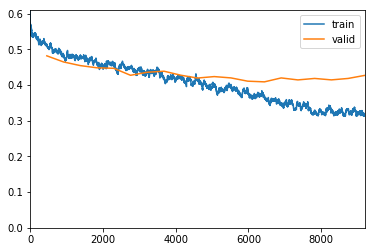

In [64]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(5e-5, 1e-3),wd=1e-3)

In [65]:
learn.save('stage-3')

## Progressive resize 3

In [66]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [67]:
learn = None
gc.collect()

21010

In [68]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph],pretrained=True
).to_fp16()

In [69]:
learn.load('stage-3');

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.442296,0.412949,0.824345,0.625911,01:06
1,0.427838,0.404194,0.821763,0.618013,01:06
2,0.429277,0.413434,0.819726,0.620926,01:06
3,0.439892,0.511922,0.804646,0.581036,01:07
4,0.439815,0.505970,0.800163,0.578495,01:06
5,0.432138,0.536220,0.751257,0.489734,01:07
6,0.426219,0.438601,0.804782,0.592519,01:07
7,0.419821,0.434785,0.811303,0.599568,01:10
8,0.411606,0.444291,0.802880,0.577470,01:09
9,0.394327,0.439061,0.808042,0.589250,01:10


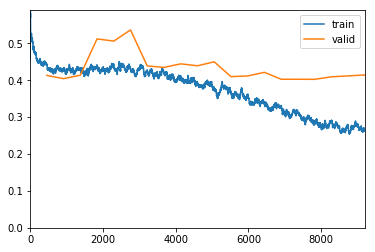

In [70]:
learn.unfreeze()
learn.fit_one_cycle(20,wd=1e-3)

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


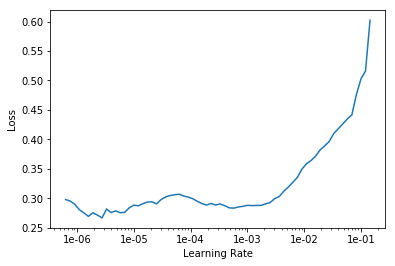

In [71]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.273790,0.425860,0.834533,0.648441,01:09
1,0.313948,0.430237,0.828556,0.631501,01:11
2,0.333877,0.434620,0.808178,0.596897,01:13
3,0.381421,0.455649,0.803423,0.588521,01:12
4,0.382433,0.520984,0.763891,0.499674,01:13
5,0.384607,0.476033,0.788072,0.560990,01:11
6,0.403323,0.461356,0.801250,0.565811,01:08
7,0.383494,0.436928,0.803967,0.581209,01:07
8,0.393242,0.456555,0.789431,0.545290,01:08
9,0.373512,0.437855,0.815378,0.606180,01:10


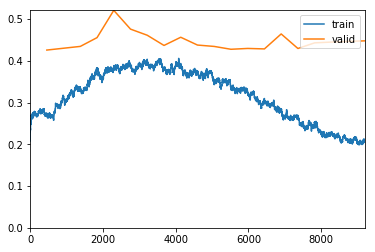

In [72]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(5e-4, 1e-3),wd=1e-3)

# xresnet34 

In [73]:
learn = None
gc.collect()

21080

In [74]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


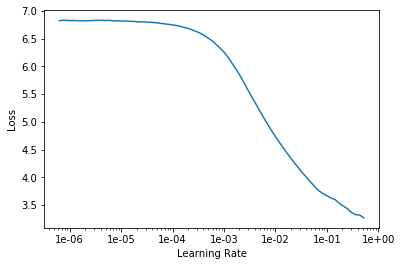

In [75]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.669702,0.648402,0.625323,0.103597,01:20
1,0.645535,0.646001,0.618394,0.206072,01:15
2,0.624987,0.593639,0.685776,0.315895,01:18
3,0.613677,0.595398,0.682652,0.276646,01:17
4,0.596454,0.576349,0.705067,0.318955,01:17
5,0.575380,0.557831,0.722864,0.405159,01:14
6,0.550065,0.556875,0.724766,0.414009,01:16
7,0.561961,0.542481,0.725988,0.372132,01:15
8,0.528555,0.514001,0.753294,0.452071,01:15
9,0.531010,0.525936,0.749355,0.435548,01:18


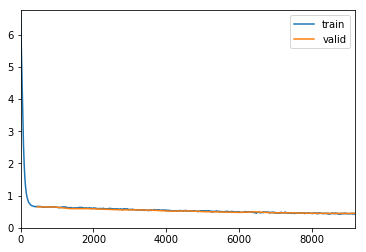

In [76]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(4e-3),wd=1e-3)

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


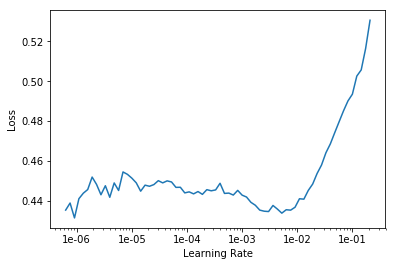

In [77]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.446687,0.451726,0.798805,0.574561,01:14
1,0.456420,0.454805,0.793370,0.563070,01:15
2,0.470579,0.497000,0.769053,0.502217,01:15
3,0.490763,0.478733,0.779921,0.519529,01:14
4,0.485462,0.489159,0.775574,0.507184,01:14
5,0.478008,0.476363,0.785763,0.536963,01:15
6,0.485883,0.477230,0.787801,0.547641,01:15
7,0.481661,0.471104,0.786035,0.540721,01:14
8,0.460735,0.473428,0.778155,0.530466,01:15
9,0.466503,0.468221,0.784540,0.527041,01:15


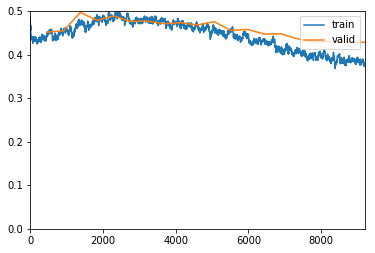

In [79]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(4e-3),wd=1e-3)

In [80]:
learn.save('stage-1')

## Progressive resize 1

In [85]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [86]:
learn = None
gc.collect()

18946

In [89]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

In [90]:
learn.load('stage-1');

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


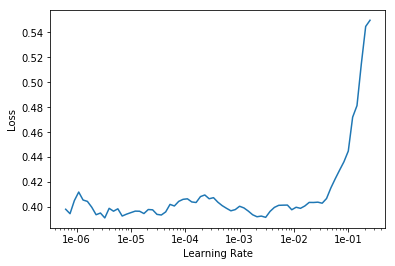

In [91]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.403269,0.369790,0.838609,0.658376,01:14
1,0.402741,0.389544,0.829779,0.639137,01:14
2,0.433725,0.421277,0.812933,0.601197,01:14
3,0.432548,0.446583,0.797038,0.578390,01:14
4,0.448701,0.442130,0.795001,0.574218,01:17
5,0.446949,0.453610,0.794186,0.554241,01:15
6,0.444152,0.436834,0.799348,0.578018,01:19
7,0.448787,0.455027,0.790246,0.553557,01:15
8,0.452271,0.460540,0.788616,0.541788,01:15
9,0.436242,0.436773,0.802744,0.576026,01:14


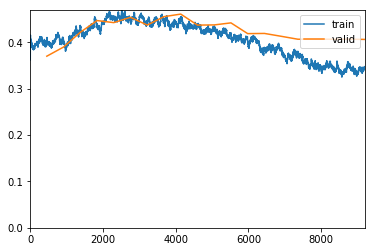

In [93]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(5e-3),wd=1e-3)

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


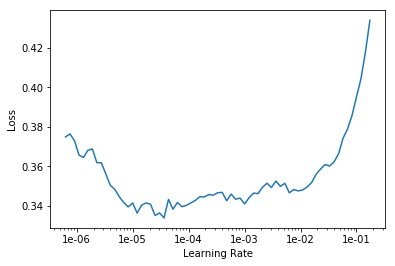

In [94]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.325837,0.404547,0.827469,0.635972,01:20
1,0.343245,0.403891,0.828013,0.638635,01:20
2,0.343341,0.405253,0.828963,0.638685,01:20
3,0.337755,0.406996,0.827877,0.636850,01:15
4,0.336739,0.405621,0.829779,0.641318,01:15
5,0.346594,0.405974,0.826382,0.634926,01:19
6,0.336120,0.405357,0.826518,0.635194,01:18
7,0.331786,0.408954,0.829371,0.639034,01:18
8,0.340164,0.407255,0.828828,0.639226,01:20
9,0.335438,0.407320,0.827197,0.635363,01:15


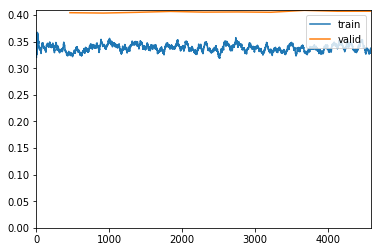

In [96]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(4e-6),wd=1e-2)

In [97]:
learn.save('stage-2')

## Progressive resize 2

In [98]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=256)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [99]:
learn = None
gc.collect()

9751

In [100]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

In [101]:
learn.load('stage-2');

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


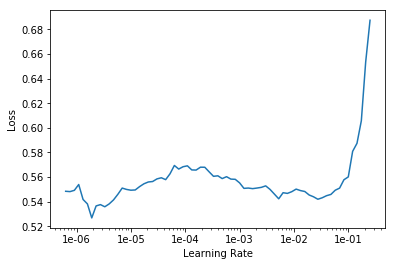

In [102]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.555615,0.526929,0.748540,0.458299,02:25
1,0.524581,0.503843,0.762532,0.490825,02:25
2,0.501503,0.479950,0.774895,0.515334,02:26
3,0.494790,0.463336,0.790110,0.549547,02:26
4,0.471946,0.453915,0.795137,0.559319,02:26
5,0.456287,0.448616,0.799348,0.568216,02:27
6,0.459149,0.442024,0.805054,0.582200,02:27
7,0.458748,0.436984,0.805597,0.584610,02:27
8,0.426294,0.434646,0.807363,0.587260,02:27
9,0.453994,0.433928,0.807499,0.586112,02:27


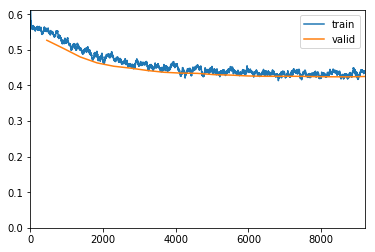

In [104]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4),wd=1e-3)

In [106]:
learn.save('stage-3')

## Progressive resize 3

In [107]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [108]:
learn = None
gc.collect()

33043

In [111]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

In [112]:
learn.load('stage-3');

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.373041,0.348823,0.847439,0.673521,01:16
1,0.374650,0.340927,0.850971,0.685125,01:15
2,0.370104,0.356316,0.844722,0.670411,01:14
3,0.371151,0.389646,0.825431,0.640402,01:14
4,0.388796,0.392297,0.826654,0.636825,01:14
5,0.383872,0.379857,0.832360,0.646349,01:15
6,0.376962,0.387382,0.829643,0.638307,01:14
7,0.382229,0.387010,0.828963,0.632992,01:17
8,0.374557,0.378312,0.830186,0.643017,01:18
9,0.363792,0.375259,0.835892,0.651799,01:17


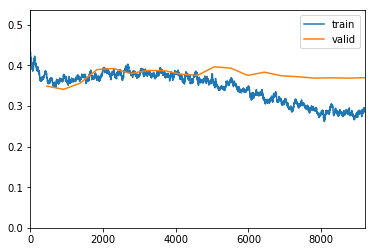

In [113]:
learn.unfreeze()
learn.fit_one_cycle(20,wd=1e-3)

# dense 

In [114]:
learn = None
gc.collect()

13924

In [115]:
learn = cnn_learner(
    data,
    models.densenet121,
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

/home/subhaditya/anaconda3/lib/python3.7/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


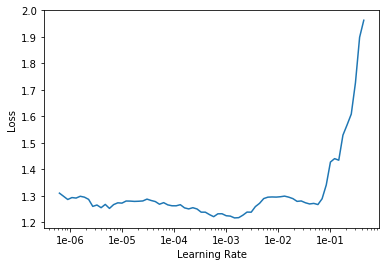

In [116]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
# learn.unfreeze()
learn.fit_one_cycle(20,slice(6e-4,6e-2),wd=1e-3)

In [118]:
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


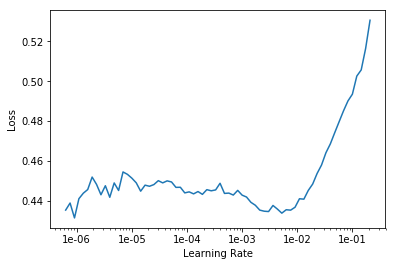

In [77]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.446687,0.451726,0.798805,0.574561,01:14
1,0.456420,0.454805,0.793370,0.563070,01:15
2,0.470579,0.497000,0.769053,0.502217,01:15
3,0.490763,0.478733,0.779921,0.519529,01:14
4,0.485462,0.489159,0.775574,0.507184,01:14
5,0.478008,0.476363,0.785763,0.536963,01:15
6,0.485883,0.477230,0.787801,0.547641,01:15
7,0.481661,0.471104,0.786035,0.540721,01:14
8,0.460735,0.473428,0.778155,0.530466,01:15
9,0.466503,0.468221,0.784540,0.527041,01:15


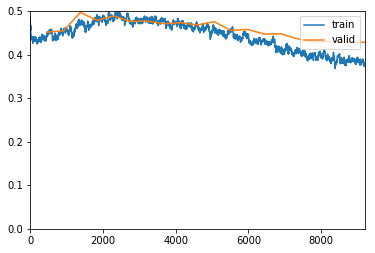

In [79]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(4e-3),wd=1e-3)

In [80]:
learn.save('stage-1')

## Progressive resize 1

In [85]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [86]:
learn = None
gc.collect()

18946

In [89]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

In [90]:
learn.load('stage-1');

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


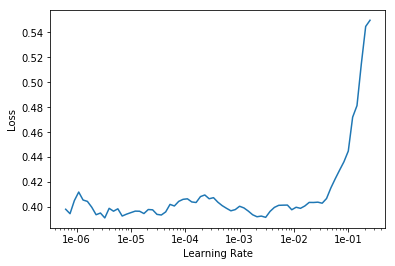

In [91]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.403269,0.369790,0.838609,0.658376,01:14
1,0.402741,0.389544,0.829779,0.639137,01:14
2,0.433725,0.421277,0.812933,0.601197,01:14
3,0.432548,0.446583,0.797038,0.578390,01:14
4,0.448701,0.442130,0.795001,0.574218,01:17
5,0.446949,0.453610,0.794186,0.554241,01:15
6,0.444152,0.436834,0.799348,0.578018,01:19
7,0.448787,0.455027,0.790246,0.553557,01:15
8,0.452271,0.460540,0.788616,0.541788,01:15
9,0.436242,0.436773,0.802744,0.576026,01:14


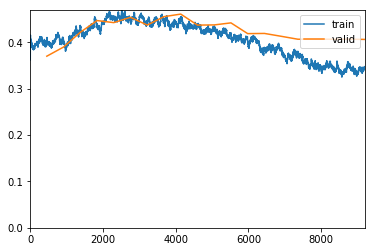

In [93]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(5e-3),wd=1e-3)

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


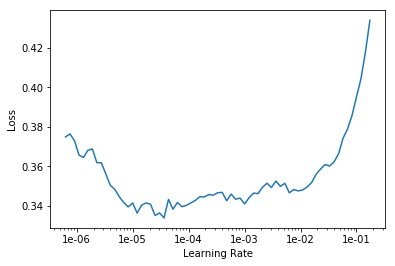

In [94]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.325837,0.404547,0.827469,0.635972,01:20
1,0.343245,0.403891,0.828013,0.638635,01:20
2,0.343341,0.405253,0.828963,0.638685,01:20
3,0.337755,0.406996,0.827877,0.636850,01:15
4,0.336739,0.405621,0.829779,0.641318,01:15
5,0.346594,0.405974,0.826382,0.634926,01:19
6,0.336120,0.405357,0.826518,0.635194,01:18
7,0.331786,0.408954,0.829371,0.639034,01:18
8,0.340164,0.407255,0.828828,0.639226,01:20
9,0.335438,0.407320,0.827197,0.635363,01:15


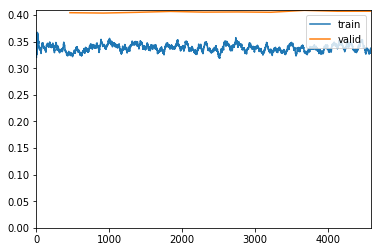

In [96]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(4e-6),wd=1e-2)

In [97]:
learn.save('stage-2')

## Progressive resize 2

In [98]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=256)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [99]:
learn = None
gc.collect()

9751

In [100]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

In [101]:
learn.load('stage-2');

epoch,train_loss,valid_loss,accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


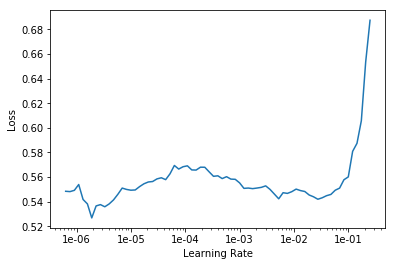

In [102]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.555615,0.526929,0.748540,0.458299,02:25
1,0.524581,0.503843,0.762532,0.490825,02:25
2,0.501503,0.479950,0.774895,0.515334,02:26
3,0.494790,0.463336,0.790110,0.549547,02:26
4,0.471946,0.453915,0.795137,0.559319,02:26
5,0.456287,0.448616,0.799348,0.568216,02:27
6,0.459149,0.442024,0.805054,0.582200,02:27
7,0.458748,0.436984,0.805597,0.584610,02:27
8,0.426294,0.434646,0.807363,0.587260,02:27
9,0.453994,0.433928,0.807499,0.586112,02:27


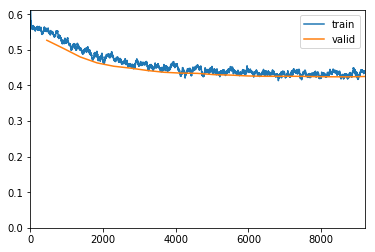

In [104]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4),wd=1e-3)

In [106]:
learn.save('stage-3')

## Progressive resize 3

In [107]:
data = (
    (
        ImageList.from_df(fin, path)
        .split_by_rand_pct()
        .label_from_df(cols=1)
        .transform(get_transforms(), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [108]:
learn = None
gc.collect()

33043

In [111]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy,kappa],
    opt_func=AdamW,
    callback_fns=[ShowGraph]
).to_fp16()

In [112]:
learn.load('stage-3');

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.373041,0.348823,0.847439,0.673521,01:16
1,0.374650,0.340927,0.850971,0.685125,01:15
2,0.370104,0.356316,0.844722,0.670411,01:14
3,0.371151,0.389646,0.825431,0.640402,01:14
4,0.388796,0.392297,0.826654,0.636825,01:14
5,0.383872,0.379857,0.832360,0.646349,01:15
6,0.376962,0.387382,0.829643,0.638307,01:14
7,0.382229,0.387010,0.828963,0.632992,01:17
8,0.374557,0.378312,0.830186,0.643017,01:18
9,0.363792,0.375259,0.835892,0.651799,01:17


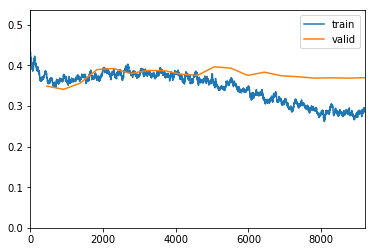

In [113]:
learn.unfreeze()
learn.fit_one_cycle(20,wd=1e-3)